In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import datetime
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.pipeline import make_pipeline
# from imblearn.over_sampling import ADASYN, SMOTE
# from imblearn.under_sampling import AllKNN
# from imblearn.combine import SMOTEENN

# Load data

In [2]:
data = pd.read_csv("../output/clustering.csv",index_col=0)

In [24]:
data.head()

,mean_num_pages,mean_num_rating,mean_rating_count,amount,num_biography,num_children,num_comics,num_crime,num_fantasy,num_fiction,...,rating_historical fiction,rating_history,rating_mystery,rating_non-fiction,rating_paranormal,rating_poetry,rating_romance,rating_thriller,rating_young-adult,cluster
0,224.258065,3.870968,1.899387e+05,7,3.0,1.0,2.0,2.0,1.0,3.0,...,4.0,4.0,3.5,4.0,4.0,0.0,4.0,3.5,4.0,0
1,254.000000,4.000000,2.083940e+05,10,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,4
2,283.000000,4.000000,9.843800e+04,4,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,1
3,528.000000,4.000000,8.386600e+04,2,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,3
4,503.000000,4.000000,1.128913e+06,5,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,3


In [5]:
Y_data = data[['cluster']]
X_data = data.drop('cluster',axis=1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

# Training model

In [28]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
  # Get Test Scores Mean and std for each grid search
  scores_mean = cv_results['mean_test_score']
  scores_mean = np.array(scores_mean).reshape(len(grid_param_2), len(grid_param_1))

  scores_sd = cv_results['std_test_score']
  scores_sd = np.array(scores_sd).reshape(len(grid_param_2), len(grid_param_1))

  # Plot Grid search scores
  _, ax = plt.subplots(1, 1, figsize=(15, 12))

  # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
  for idx, val in enumerate(grid_param_2):
    ax.plot(grid_param_1, scores_mean[idx,:], '-o', label = name_param_2 + ': ' + str(val))

  ax.set_title("Randomized Search Scores", fontsize = 16, fontweight = 'bold')
  ax.set_xlabel(name_param_1, fontsize = 15)
  ax.set_ylabel('CV Average Score', fontsize = 15)
  ax.legend(loc = 'upper right', fontsize = 15)
  ax.grid('on')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=200; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=400; total time=   1.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=600; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   2.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.2, n_estimators=800; total time=   3.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   4.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1000; total time=   3.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1200; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   5.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   5.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   5.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   6.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   5.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   5.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   5.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   5.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   5.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1400; total time=   6.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   7.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   7.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   7.1s
[CV] END ................max_features=0.2, n_estimators=1600; total time=   7.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   8.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   7.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   6.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   6.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1600; total time=   6.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=1800; total time=   7.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   8.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   8.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   8.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   8.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   7.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   8.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   7.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   7.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   8.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.2, n_estimators=2000; total time=   8.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=200; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=400; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=600; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.5s
[CV] END .................max_features=0.4, n_estimators=800; total time=   4.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.4, n_estimators=800; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   5.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   6.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   6.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   6.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   5.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   6.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   5.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   5.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   5.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1000; total time=   5.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   8.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1200; total time=   7.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   9.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   9.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   8.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   8.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=  10.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   8.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   8.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   8.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   9.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1400; total time=   8.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=  10.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=  10.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=   9.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=   9.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=   9.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=   9.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=   9.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=   9.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=   9.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1600; total time=   9.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  10.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  10.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  11.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  11.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  11.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  11.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  11.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  11.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  10.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=1800; total time=  11.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.4, n_estimators=2000; total time=  12.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=200; total time=   1.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=400; total time=   3.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=600; total time=   4.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ..max_features=0.6000000000000001, n_estimators=800; total time=   6.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   8.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   9.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   8.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   8.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   8.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   8.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   8.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   7.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   8.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1000; total time=   8.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   9.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   9.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   9.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   9.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   9.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   9.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   9.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   8.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   9.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1200; total time=   8.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  11.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1400; total time=  10.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  13.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  12.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  12.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  12.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  12.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  13.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  12.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  12.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  12.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1600; total time=  12.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  15.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  14.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  14.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  14.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  13.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  14.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  13.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  13.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  14.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=1800; total time=  14.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  15.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  15.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  17.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  16.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  15.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  16.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  18.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  15.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  15.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .max_features=0.6000000000000001, n_estimators=2000; total time=  17.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   2.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   2.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   2.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   2.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   1.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   1.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   1.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   1.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   1.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=200; total time=   1.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   3.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   3.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   3.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   3.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   3.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   3.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   3.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   4.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   4.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=400; total time=   4.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   7.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   6.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   5.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   5.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   5.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   6.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   6.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=600; total time=   6.0s
[CV] END .................max_features=0.8, n_estimators=600; total time=   5.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   8.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=0.8, n_estimators=800; total time=   7.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=   9.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=  10.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=   9.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=   9.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=   9.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=  10.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=   9.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=   9.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=   9.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1000; total time=   9.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  10.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1200; total time=  11.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  13.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  13.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  12.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  12.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  14.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  14.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  13.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  12.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  13.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1400; total time=  15.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  17.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  15.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  16.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  16.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  15.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  15.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  16.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  16.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  15.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1600; total time=  15.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  20.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  17.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  17.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  19.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  18.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  17.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  18.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  19.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  18.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=1800; total time=  17.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  19.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  19.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  19.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  20.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  19.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  20.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  20.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  23.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  18.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=0.8, n_estimators=2000; total time=  18.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=200; total time=   2.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=400; total time=   4.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=600; total time=   6.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   8.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   8.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   8.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   8.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   9.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   8.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   8.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   8.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   8.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................max_features=1.0, n_estimators=800; total time=   9.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  11.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  11.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  11.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  12.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  12.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  12.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  11.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  12.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  12.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1000; total time=  11.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  13.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  13.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  13.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  14.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  15.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  15.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  15.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  14.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  13.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1200; total time=  13.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  15.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  17.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  17.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  17.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  18.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  17.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  15.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  16.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  16.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1400; total time=  16.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  18.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  17.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  18.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  17.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  17.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  17.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  18.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  18.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  18.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1600; total time=  21.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  21.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  21.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  22.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  20.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  22.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  22.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  20.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  23.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  20.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=1800; total time=  21.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  26.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  25.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  26.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  23.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  24.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  26.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  22.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  26.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  24.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END ................max_features=1.0, n_estimators=2000; total time=  24.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Best Params:  {'max_features': 0.2, 'n_estimators': 2000}


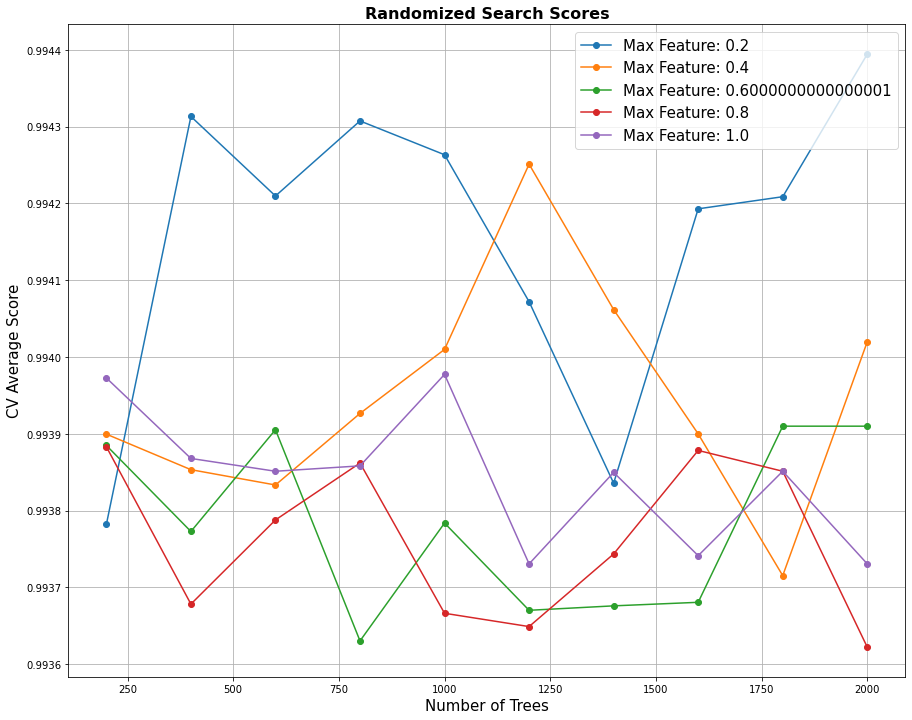

In [29]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(200, 2000, num = 10)]

# max depth
max_feature = list(np.arange(0.2, 1.1, 0.2))

# create random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_feature
}

# Random search of parameters
rfc = RandomForestClassifier()
rfc_random = GridSearchCV(estimator = rfc, 
                          param_grid = random_grid, 
                          scoring = 'f1_macro', 
                          cv = 10, 
                          verbose = 2)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print("Best Params: ", rfc_random.best_params_)
plot_grid_search(rfc_random.cv_results_, n_estimators, max_feature, 'Number of Trees', 'Max Feature')

In [30]:
print("\nBest n_estimators:\n",rfc_random.best_params_['n_estimators'])
print("\nBest Max features:\n",rfc_random.best_params_['max_features'])


Best n_estimators:
 2000

Best Max features:
 0.2


In [31]:
rfc = RandomForestClassifier(n_estimators = rfc_random.best_params_['n_estimators'], 
                             max_features = rfc_random.best_params_['max_features'])
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Confusion Matrix:
 [[ 561    0    0    0    2]
 [   0  853    0    1    0]
 [   1    0  712    0    0]
 [   0    0    0 1486    3]
 [   3    0    6    0  884]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       563
           1       1.00      1.00      1.00       854
           2       0.99      1.00      1.00       713
           3       1.00      1.00      1.00      1489
           4       0.99      0.99      0.99       893

    accuracy                           1.00      4512
   macro avg       1.00      1.00      1.00      4512
weighted avg       1.00      1.00      1.00      4512



=== Feature Importance ===


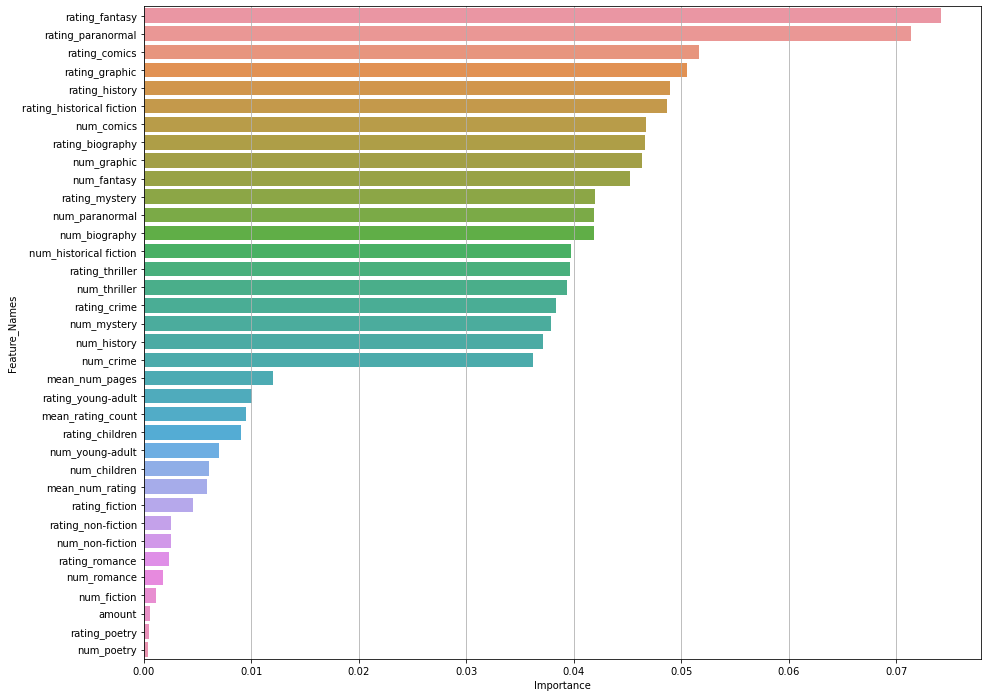

In [33]:
print("=== Feature Importance ===")
names = X_data.columns

importance = {'Feature_Names': names[:], 'Importance': rfc.feature_importances_}
importance_df = pd.DataFrame(importance)

plt.figure(figsize = (15, 12))
plt.grid()
sns.barplot(x = "Importance", y = "Feature_Names", data = importance_df.sort_values(by = "Importance", ascending = False))
importance_df.to_csv("important_df.csv", index = False)

# Shap

In [9]:
def load_pickle(path):
    with open(path,'rb') as f:
        return pickle.load(f)
def save_pickle(a,path):
    with open(path, 'wb') as f:
        pickle.dump(a, f)

In [10]:
import pickle

In [12]:
rfc = load_pickle('../output/rfc.pkl')
explainer = shap.TreeExplainer(rfc)

Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [13]:
shap_values=explainer.shap_values(X_test)
#shap_obj = explainer(X)

In [16]:
save_pickle(shap_values,'../output/shap_values.pkl')

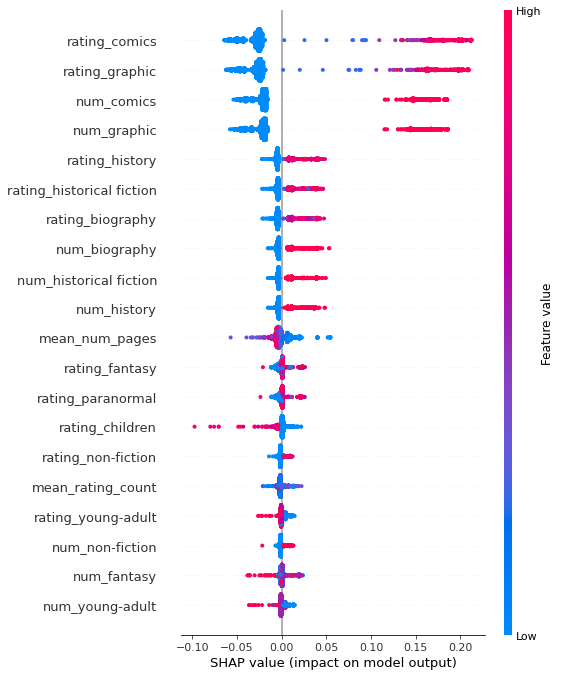

In [14]:
shap.summary_plot(shap_values[0], X_test)

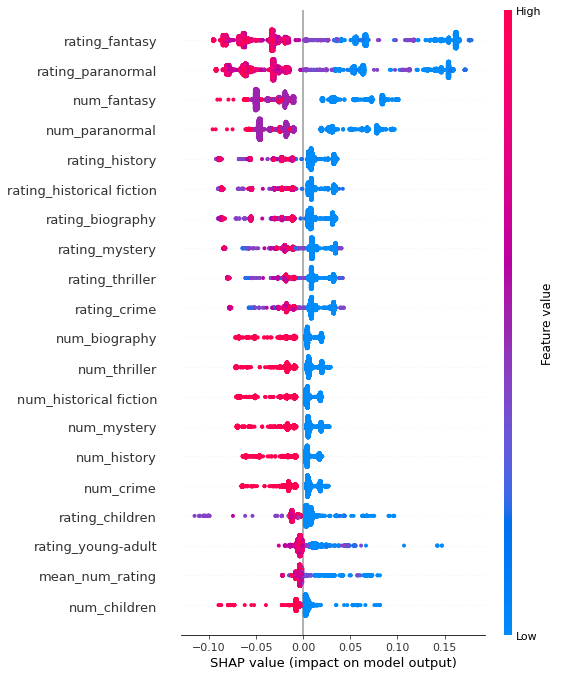

In [15]:
shap.summary_plot(shap_values[1], X_test)

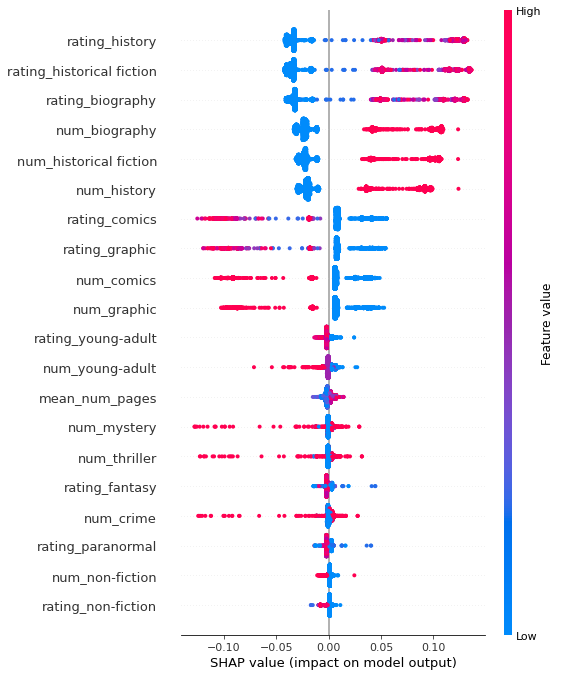

In [17]:
shap.summary_plot(shap_values[2], X_test)

In [23]:
data.head()

,mean_num_pages,mean_num_rating,mean_rating_count,amount,num_biography,num_children,num_comics,num_crime,num_fantasy,num_fiction,...,rating_historical fiction,rating_history,rating_mystery,rating_non-fiction,rating_paranormal,rating_poetry,rating_romance,rating_thriller,rating_young-adult,cluster
0,224.258065,3.870968,1.899387e+05,7,3.0,1.0,2.0,2.0,1.0,3.0,...,4.0,4.0,3.5,4.0,4.0,0.0,4.0,3.5,4.0,0
1,254.000000,4.000000,2.083940e+05,10,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,4
2,283.000000,4.000000,9.843800e+04,4,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,1
3,528.000000,4.000000,8.386600e+04,2,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,3
4,503.000000,4.000000,1.128913e+06,5,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,3


1,4 short reader,2 long reader,3 for all, 1 buy less, low rate

<AxesSubplot:xlabel='cluster', ylabel='amount'>

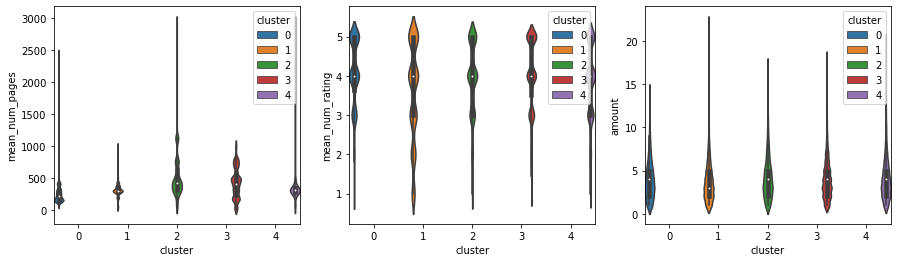

In [24]:
fig, axes = plt.subplots(1, 3,figsize = (15,4))
sns.violinplot(ax = axes[0],data  = data[data['mean_num_pages'] < 3000],x = 'cluster', y = 'mean_num_pages',hue='cluster',width=1)
sns.violinplot(ax = axes[1],data  = data,x = 'cluster', y = 'mean_num_rating',hue='cluster',width=1)
sns.violinplot(ax = axes[2],data  = data,x = 'cluster', y = 'amount',hue='cluster',width=1)

# genre amount

In [40]:
num_df = data.filter(regex='num_')
num_df.index = data['cluster']
num_df = pd.DataFrame(num_df.drop(['mean_num_pages','mean_num_rating'], axis = 1).stack()).reset_index()

In [42]:
num_df.columns = ['cluster','genre','amount']
num_df.head()

,cluster,genre,amount
0,0,num_biography,3.0
1,0,num_children,1.0
2,0,num_comics,2.0
3,0,num_crime,2.0
4,0,num_fantasy,1.0


In [70]:
agg_genre = num_df.groupby(['cluster','genre']).agg(mean_num = ('amount','mean')).reset_index()

In [75]:
agg_genre[agg_genre['cluster'] == 1]

,cluster,genre,mean_num
16,1,num_biography,0.003973
17,1,num_children,0.100036
18,1,num_comics,0.000722
19,1,num_crime,0.011557
20,1,num_fantasy,0.114482
21,1,num_fiction,1.007223
22,1,num_graphic,0.000722
23,1,num_historical fiction,0.003973
24,1,num_history,0.003973
25,1,num_mystery,0.011557


In [63]:
num_df[num_df['cluster'] == 0].groupby('genre').agg(mean_num = ('amount','mean'))

,mean_num
genre,
num_biography,0.646088
num_children,0.149548
num_comics,1.030335
num_crime,0.333688
num_fantasy,0.695051
num_fiction,1.119212
num_graphic,1.030335
num_historical fiction,0.646088
num_history,0.646088


Using the violinplot function without specifying `order` is likely to produce an incorrect plot.


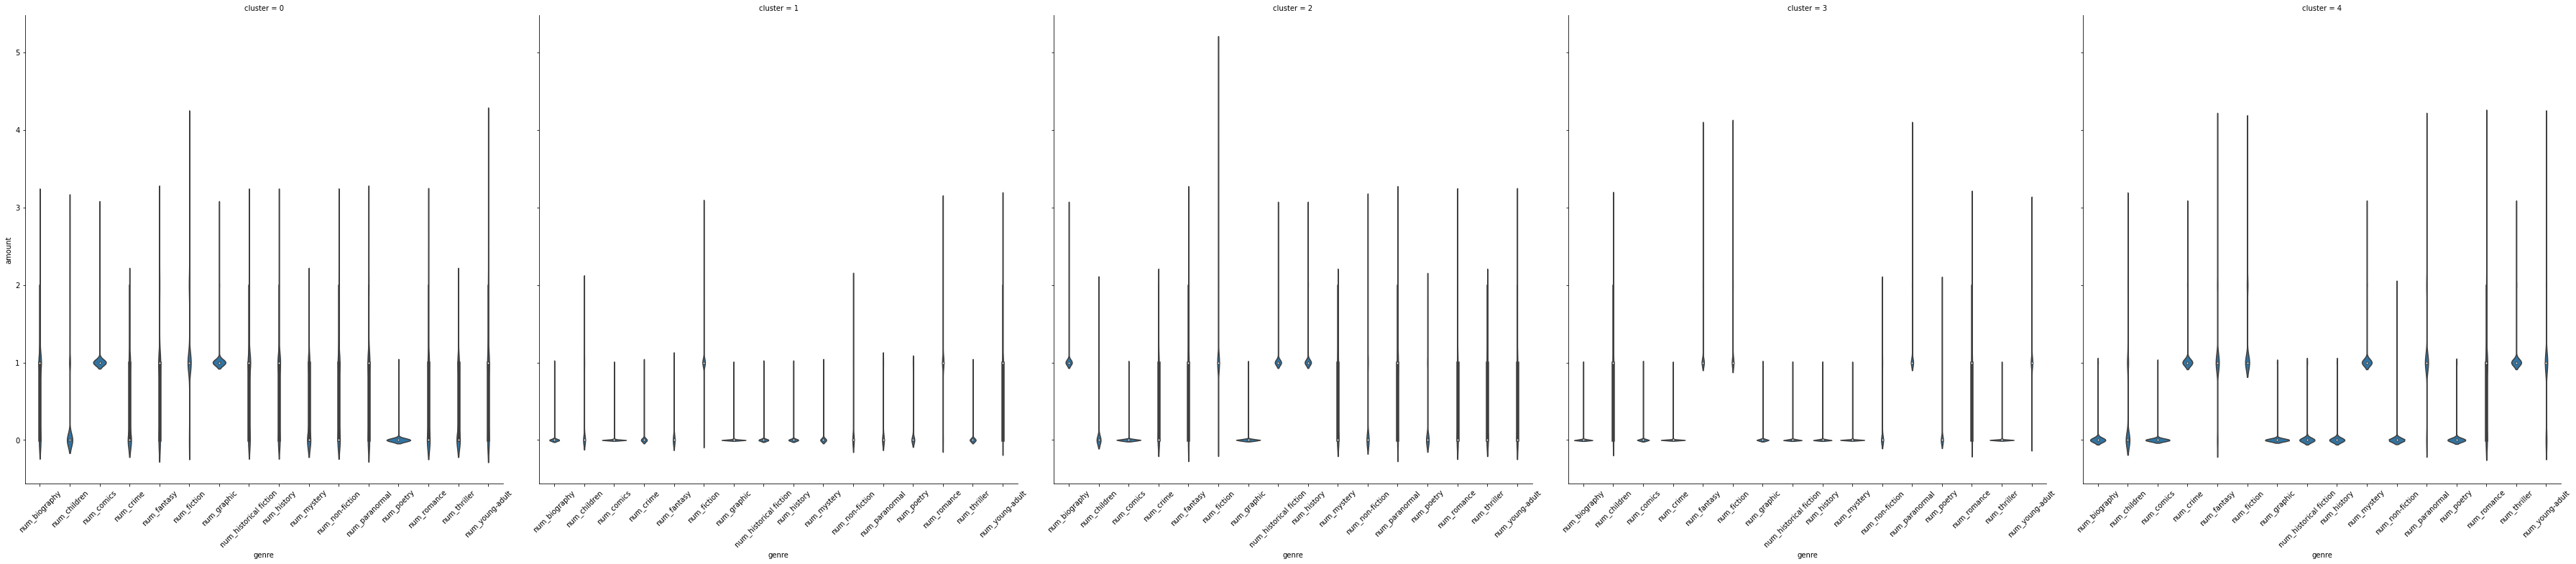

In [83]:
g = sns.FacetGrid(num_df,col="cluster", height=10, aspect=1)
g.map(sns.violinplot, "genre", "amount", )
g.set_xticklabels(rotation=45)

# genre rating

In [88]:
rating_df = data.filter(regex='rating_')
rating_df.index = data['cluster']
rating_df= pd.DataFrame(rating_df.drop(['mean_rating_count'], axis = 1).stack()).reset_index()

In [90]:
rating_df.columns = ['cluster','genre','mean_rating']
rating_df.head()

,cluster,genre,mean_rating
0,0,rating_biography,4.0
1,0,rating_children,3.0
2,0,rating_comics,4.0
3,0,rating_crime,3.5
4,0,rating_fantasy,4.0


Using the violinplot function without specifying `order` is likely to produce an incorrect plot.


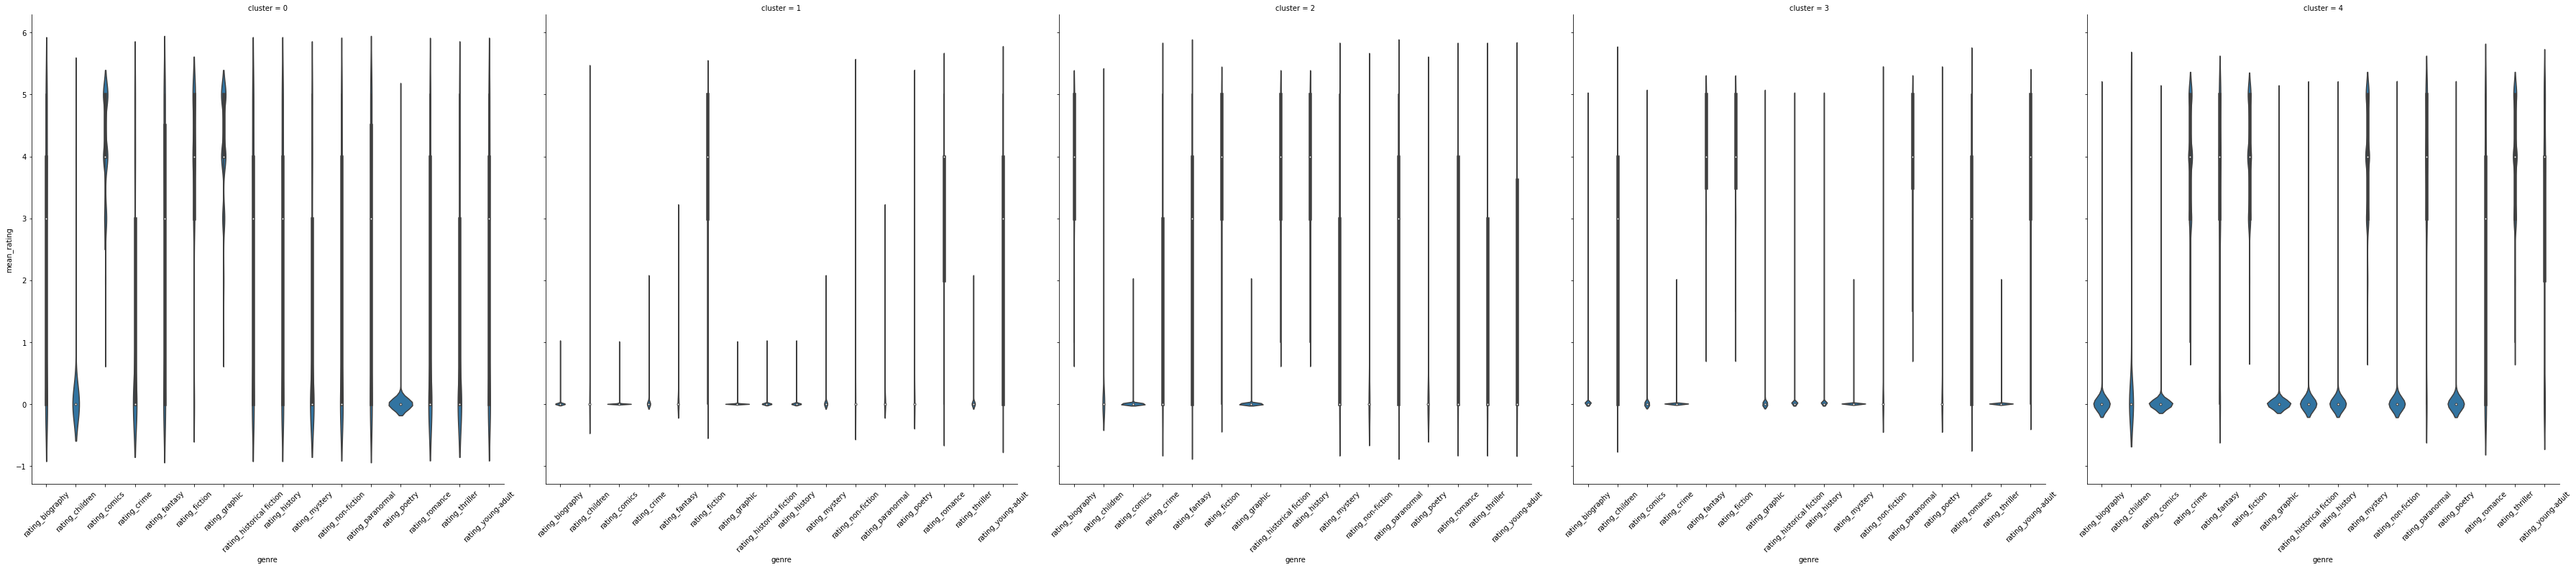

In [91]:
g = sns.FacetGrid(rating_df,col="cluster", height=10, aspect=1)
g.map(sns.violinplot, "genre", "mean_rating" )
g.set_xticklabels(rotation=45)